In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.set_printoptions(threshold=300)

In [37]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
from implement import modeling
from implementations import ridge_regression
from preprocessing import dataprocessing, split_categories
from select_features import best_set_of_features
from other import plot_train_test
import math

## Load and process data

Load data

In [3]:
y_train, x_train, ids_train = load_csv_data('train.csv', sub_sample=False)
_,      x_test,   ids_test  = load_csv_data('test.csv',  sub_sample=False)

Create categories

In [4]:
cat_0_tri, cat_1_tri, cat_2_tri, cat_3_tri, idx_0_tr, idx_1_tr, idx_2_tr, idx_3_tr = split_categories(x_train)
cat_0_tei, cat_1_tei, cat_2_tei, cat_3_tei, idx_0_te, idx_1_te, idx_2_te, idx_3_te = split_categories(x_test)

y_train_0 = y_train[idx_0_tr]
y_train_1 = y_train[idx_1_tr] 
y_train_2 = y_train[idx_2_tr]
y_train_3 = y_train[idx_3_tr]

Preprocess the data, create features

In [10]:
trx_0, tex_0 = dataprocessing(cat_0_tri, cat_0_tei, degree = 5, adddegree = True, inv = True, frac = False, sqroot = True, sqrootpos = True, cbroot = True, comb = True, comb3 = False, trigo=True, expo = False, hyperb=False,combtrigo=False)

In [11]:
trx_1, tex_1= dataprocessing(cat_1_tri, cat_1_tei, degree = 5, adddegree = True, inv = True, frac = False, sqroot = True, sqrootpos = True, cbroot = True, comb = True, comb3 = False, trigo=True, expo = False, hyperb=False,combtrigo=False)

In [12]:
trx_2, tex_2= dataprocessing(cat_2_tri, cat_2_tei, degree = 5, adddegree = True, inv = True, frac = False, sqroot = True, sqrootpos = True, cbroot = True, comb = True, comb3 = False, trigo=True, expo = False, hyperb=False,combtrigo=False)

In [13]:
trx_3, tex_3= dataprocessing(cat_3_tri, cat_3_tei, degree = 5, adddegree = True, inv = True, frac = False, sqroot = True, sqrootpos = True, cbroot = True, comb = True, comb3 = False, trigo=True, expo = False, hyperb=False,combtrigo=False)

## Best features selection

In [15]:
num_intervals_lambda = 30
nb_fold = 5
nb_crossvalid = 5
min_range = -5
max_range = 0

ok

 Accuracy = 0.7883995596036433 with feat 137
Nb of features = 0
Lamdba = 1e-05

 Accuracy = 0.8070263236913222 with feat 94
Nb of features = 1
Lamdba = 1.4873521072935119e-05

 Accuracy = 0.8098388549694725 with feat 293
Nb of features = 2
Lamdba = 2.21221629107045e-05

 Accuracy = 0.8149034130717647 with feat 104
Nb of features = 3
Lamdba = 2.21221629107045e-05

 Accuracy = 0.8230807726954259 with feat 21
Nb of features = 4
Lamdba = 4.893900918477499e-05

 Accuracy = 0.8194374937443699 with feat 18
Nb of features = 5
Lamdba = 0.00010826367338740541

 Accuracy = 0.8238014212791512 with feat 156
Nb of features = 6
Lamdba = 0.0005298316906283713

 Accuracy = 0.8227604844359924 with feat 35
Nb of features = 7
Lamdba = 0.0001610262027560939

 Accuracy = 0.8246621959763788 with feat 30
Nb of features = 8
Lamdba = 0.0001610262027560939

 Accuracy = 0.8262035832249024 with feat 91
Nb of features = 9
Lamdba = 0.00010826367338740541

 Accuracy = 0.8265639075167652 with feat 143
Nb of featur

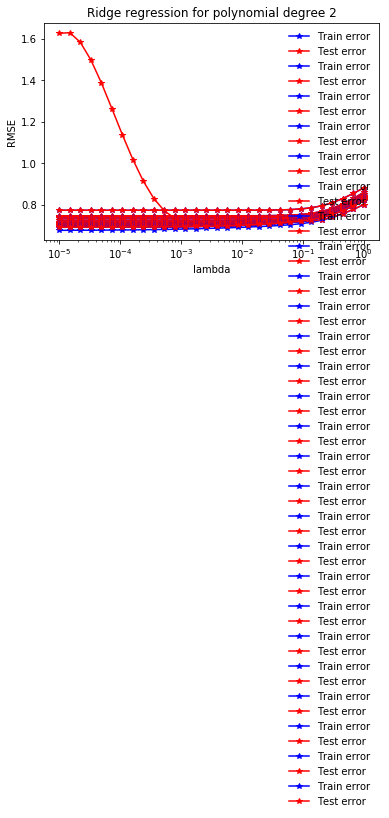

In [18]:
features_0, lambdas_0, accuracies_0 = best_set_of_features(trx_0,y_train_0, num_intervals_lambda, nb_fold, nb_crossvalid, min_range, max_range)

ok

 Accuracy = 0.6661078153211246 with feat 114
Nb of features = 0
Lamdba = 7.278953843983146e-05

 Accuracy = 0.6761542429713695 with feat 40
Nb of features = 1
Lamdba = 7.278953843983146e-05

 Accuracy = 0.6858395666752644 with feat 134
Nb of features = 2
Lamdba = 0.0003562247890262444

 Accuracy = 0.6882899148826411 with feat 403
Nb of features = 3
Lamdba = 0.0002395026619987486

 Accuracy = 0.6942868197059583 with feat 189
Nb of features = 4
Lamdba = 0.0002395026619987486

 Accuracy = 0.701470208924426 with feat 192
Nb of features = 5
Lamdba = 4.893900918477499e-05

 Accuracy = 0.7036368326025279 with feat 412
Nb of features = 6
Lamdba = 7.278953843983146e-05

 Accuracy = 0.7060098013928295 with feat 22
Nb of features = 7
Lamdba = 0.0001610262027560939

 Accuracy = 0.7089373226721692 with feat 342
Nb of features = 8
Lamdba = 0.0002395026619987486

 Accuracy = 0.7098142893990198 with feat 213
Nb of features = 9
Lamdba = 0.0003562247890262444

 Accuracy = 0.7147923652308485 with fea

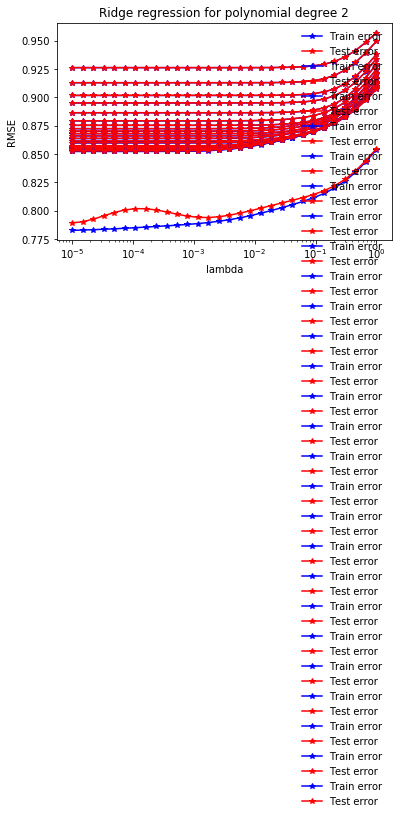

In [19]:
features_1, lambdas_1, accuracies_1 = best_set_of_features(trx_1,y_train_1, num_intervals_lambda, nb_fold, nb_crossvalid, min_range, max_range)

ok

 Accuracy = 0.7068982630272952 with feat 313
Nb of features = 0
Lamdba = 1e-05

 Accuracy = 0.7228784119106699 with feat 142
Nb of features = 1
Lamdba = 1e-05

 Accuracy = 0.7432853598014889 with feat 258
Nb of features = 2
Lamdba = 0.0003562247890262444

 Accuracy = 0.7478908188585608 with feat 637
Nb of features = 3
Lamdba = 0.0003562247890262444

 Accuracy = 0.757439205955335 with feat 153
Nb of features = 4
Lamdba = 0.0002395026619987486

 Accuracy = 0.7639305210918115 with feat 284
Nb of features = 5
Lamdba = 0.0007880462815669912

 Accuracy = 0.7668486352357321 with feat 423
Nb of features = 6
Lamdba = 0.0005298316906283713

 Accuracy = 0.7706600496277917 with feat 227
Nb of features = 7
Lamdba = 0.0005298316906283713

 Accuracy = 0.7746302729528536 with feat 49
Nb of features = 8
Lamdba = 0.0005298316906283713

 Accuracy = 0.7753846153846153 with feat 165
Nb of features = 9
Lamdba = 0.0003562247890262444

 Accuracy = 0.7779255583126551 with feat 145
Nb of features = 10
Lamdb

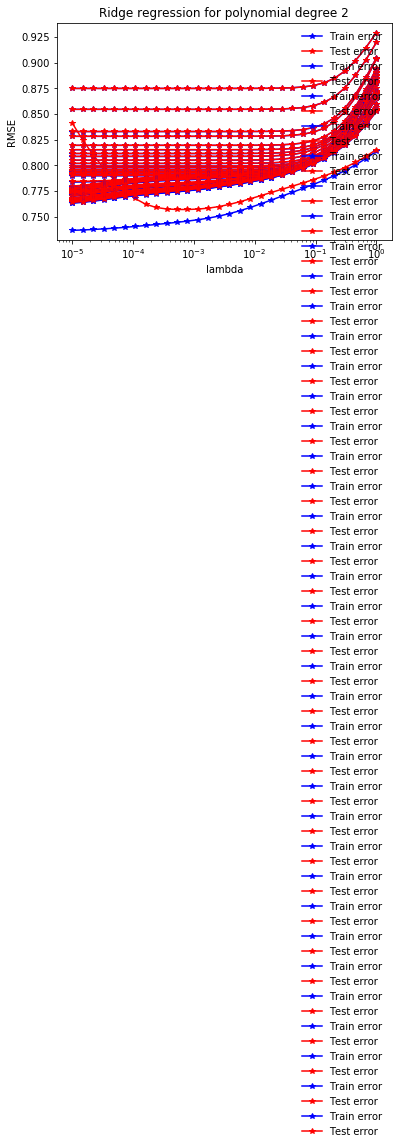

In [20]:
features_2, lambdas_2, accuracies_2 = best_set_of_features(trx_2,y_train_2, num_intervals_lambda, nb_fold, nb_crossvalid, min_range, max_range)

ok

 Accuracy = 0.6964801444043321 with feat 313
Nb of features = 0
Lamdba = 1e-05

 Accuracy = 0.7237364620938629 with feat 338
Nb of features = 1
Lamdba = 1e-05

 Accuracy = 0.7277978339350181 with feat 142
Nb of features = 2
Lamdba = 1e-05

 Accuracy = 0.7393953068592058 with feat 258
Nb of features = 3
Lamdba = 0.00010826367338740541

 Accuracy = 0.7470667870036102 with feat 145
Nb of features = 4
Lamdba = 0.0002395026619987486

 Accuracy = 0.7501805054151625 with feat 234
Nb of features = 5
Lamdba = 0.0002395026619987486

 Accuracy = 0.7553700361010831 with feat 187
Nb of features = 6
Lamdba = 0.0005298316906283713

 Accuracy = 0.7572202166064983 with feat 503
Nb of features = 7
Lamdba = 0.0005298316906283713

 Accuracy = 0.7590252707581228 with feat 644
Nb of features = 8
Lamdba = 0.0007880462815669912

 Accuracy = 0.7594314079422383 with feat 618
Nb of features = 9
Lamdba = 0.0005298316906283713

 Accuracy = 0.7629061371841155 with feat 284
Nb of features = 10
Lamdba = 0.0005298

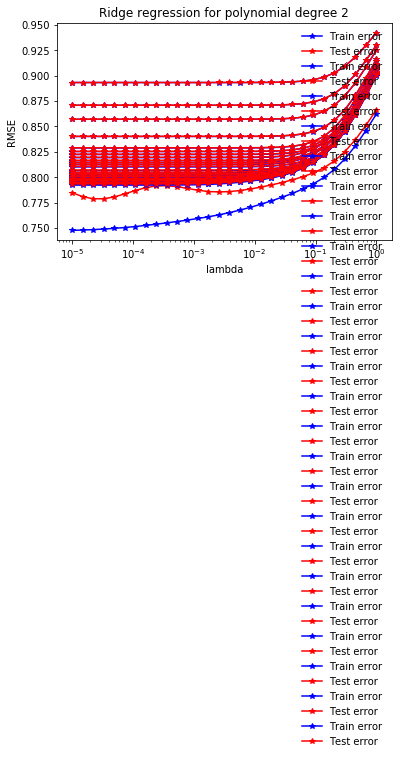

In [21]:
features_3, lambdas_3, accuracies_3 = best_set_of_features(trx_3,y_train_3, num_intervals_lambda, nb_fold, nb_crossvalid, min_range, max_range)

In [22]:
lamb_0 = lambdas_0[-3]
lamb_1 = lambdas_1[-3]
lamb_2 = lambdas_2[-3]
lamb_3 = lambdas_3[-3]

In [23]:
feat_0 = features_0[:-1]
feat_1 = features_1[:-1]
feat_2 = features_2[:-1]
feat_3 = features_3[:-1]

In [24]:
accuracy_0 = accuracies_0[:-3]
accuracy_1 = accuracies_1[:-3]
accuracy_2 = accuracies_2[:-3]
accuracy_3 = accuracies_3[:-3]

In [25]:
trx_fast_0 = trx_0[:,feat_0]
trx_fast_1 = trx_1[:,feat_1]
trx_fast_2 = trx_2[:,feat_2]
trx_fast_3 = trx_3[:,feat_3]

tex_fast_0 = tex_0[:,feat_0]
tex_fast_1 = tex_1[:,feat_1]
tex_fast_2 = tex_2[:,feat_2]
tex_fast_3 = tex_3[:,feat_3]

In [26]:
print(feat_0,"\n",feat_1,"\n",feat_2,"\n",feat_3)

[0, 137, 94, 293, 104, 21, 18, 156, 35, 30, 91, 143, 151, 242, 154, 138, 97, 264, 19, 251, 158, 224, 296, 211] 
 [127, 114, 40, 134, 403, 189, 192, 412, 22, 342, 213, 233, 88, 111, 211, 23, 228, 190, 194, 82, 206, 73, 295, 54] 
 [338, 313, 142, 258, 637, 153, 284, 423, 227, 49, 165, 145, 29, 231, 42, 156, 30, 226, 170, 58, 485, 384, 413, 35, 91, 171, 309, 169, 254, 47, 96, 198, 162, 478, 45] 
 [0, 313, 338, 142, 258, 145, 234, 187, 503, 644, 618, 284, 147, 240, 411, 31, 29, 555, 119, 634, 408, 402]


## Keep it for report

In [27]:
def keep_features_number(feat_0, lamb_0, accuracy_0, name):
    with open(name, 'w') as f:
        f.write("%s " % name)
        f.write("For report all simple ones")
        f.write("degree = 5, adddegree = True, inv = True, frac = False, sqroot = True, sqrootpos = True, cbroot = True, comb = True, comb3 = False, trigo=True, expo = False, hyperb=False,combtrigo=False")
        for item in feat_0:
            f.write("%s,\n" % item)
        f.write("\n")
        
        f.write(" Lambda = %5.9f \n" % lamb_0)
        f.write(" Accuracy = %5.9f \n" % accuracy_0)

In [32]:
keep_features_number(feat_0, lamb_0, accuracy_0[-1], "categorie_0_for_report.txt")

In [33]:
keep_features_number(feat_1, lamb_1, accuracy_1[-1], "categorie_1_for_report.txt")

In [34]:
keep_features_number(feat_2, lamb_2, accuracy_2[-1], "categorie_2_for_report.txt")

In [35]:
keep_features_number(feat_3, lamb_3, accuracy_3[-1], "categorie_3_for_report.txt")

## Find w with selected x

In [38]:
w_best_0, _ = ridge_regression(y_train_0, trx_fast_0, lamb_0)
w_best_1, _ = ridge_regression(y_train_1, trx_fast_1, lamb_1)
w_best_2, _ = ridge_regression(y_train_2, trx_fast_2, lamb_2)
w_best_3, _ = ridge_regression(y_train_3, trx_fast_3, lamb_3)

## Prediction with the best model

Create prediction for each category

In [39]:
y_0_te = predict_labels(w_best_0,tex_fast_0)
y_1_te = predict_labels(w_best_1,tex_fast_1)
y_2_te = predict_labels(w_best_2,tex_fast_2)
y_3_te = predict_labels(w_best_3,tex_fast_3)

Reconstruct y in order

In [40]:
order_tab = np.concatenate((idx_0_te, idx_1_te, idx_2_te, idx_3_te))
order_idx = np.argsort(order_tab, axis=0)
y_unordered = np.concatenate((y_0_te, y_1_te, y_2_te, y_3_te))
y_pred = y_unordered[order_idx]

Create submission

In [41]:
create_csv_submission(ids_test, y_pred, "submission.csv")